In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

#matplotlib.style.use('ggplot')

In [2]:
# Analysis of aid provided in New York county school districts. Data obtained from data.ny.gov
# Link here: https://data.ny.gov/Government-Finance/New-York-State-School-Aid-Beginning-School-Year-19/9pb8-dg53

# Read CSV and cleanup
data = pd.read_csv("New_York_State_School_Aid__Beginning_School_Year_1996-97.csv")
data.sort_values(by="% Change", ascending=False).tail()
data.Event = data.Event.apply(lambda s: s.split(" ")[0])
data["% Change"] = data["% Change"].replace(np.nan, np.nan)
data = data.drop("BEDS Code", axis=1)

In [3]:
# Attributes:
# Event, BEDS Code, County, District, Aid Category, Base Year, School Year, Change, % Change

print(data.dtypes)
data.head()

Event            object
County           object
District         object
Aid Category     object
Base Year         int64
School Year     float64
Change          float64
% Change         object
dtype: object


,Event,County,District,Aid Category,Base Year,School Year,Change,% Change
0,2017-18,Albany,Albany,Academic Enhancement Aid,1247799,1247799.0,0.0,0.00%
1,2017-18,Albany,Albany,Academic Improvement Aid,1114715,1288603.0,173888.0,15.60%
2,2017-18,Albany,Albany,BOCES Aid,0,0.0,0.0,NaN
3,2017-18,Albany,Albany,Building Aid,9691212,9638912.0,-52300.0,-0.54%
4,2017-18,Albany,Albany,Building Reorganization Incentive Aid,0,0.0,0.0,NaN


In [30]:
data["Aid Category"].unique()[:10]

array(['Academic Enhancement Aid', 'Academic Improvement Aid',
       'BOCES Aid', 'Building Aid',
       'Building Reorganization Incentive Aid',
       'Charter School Transitional', 'Foundation Aid',
       'Full Day Kindergarten Conversion Aid',
       'Hardware & Technology Aid', 'High Tax Aid'], dtype=object)

In [35]:
graph_size = (15, 7)

# Corrects for possibly erroneous data that makes baseyear value equal to 0 for the year 2002-03
# *** Deprecated ***
def correct_baseyear(dataf):
    for county in dataf.index.get_level_values(0).unique():
        avg = (dataf["Base Year"][county]["2000-01"] + dataf["Base Year"][county]["2003-04"]) / 2
        dataf["Base Year"][county]["2002-03"] = avg

def generate_aid_df(aid_type):
    new_df = data[(data["Aid Category"] == aid_type)]
    ret = new_df.groupby(["County", "Event"])["Base Year", "School Year"].aggregate(sum)
    #correct_baseyear(ret)
    return ret

def create_multiindex_plot(mi_df, measure_type):
    for county in aid_mes.index.get_level_values(0).unique():
        county_data = mi_df.loc[county]
        county_data.plot(x=county_data.index, y=measure_type, ax=ax, figsize=graph_size, label=county, linewidth=0.6, legend=False)

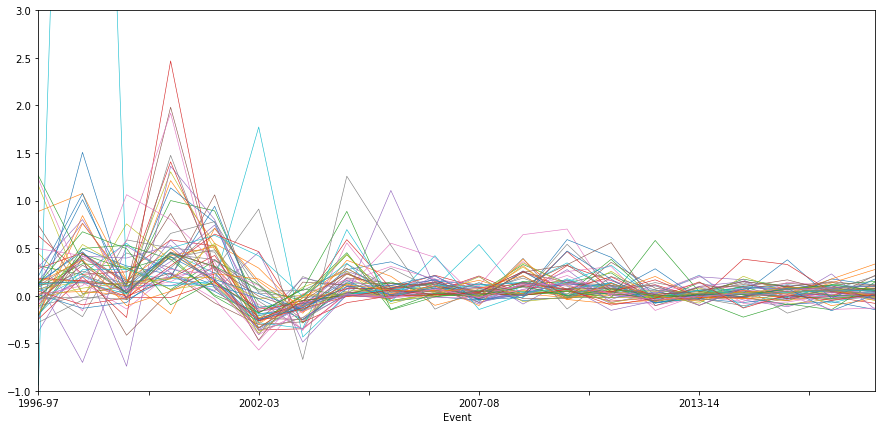

In [36]:
aid_mes = generate_aid_df("Building Aid")
aid_mes["Per Change"] = (aid_mes["School Year"] - aid_mes["Base Year"]) / (aid_mes["Base Year"])

fig, ax = plt.subplots()

# Set vertical limits on graph
plt.ylim(-1, 3)

create_multiindex_plot(aid_mes, "Per Change")

In [34]:
fig.savefig("data.svg")